# Rocket

In this example, we will use random convolutions to transform time series.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from wildboar.datasets import load_dataset
from wildboar.transform import RocketTransform

random_state = 1234

First, we load the dataset.

In [2]:
x, y = load_dataset("CBF")

Next, we define the pipeline.

In [3]:
pca = make_pipeline(
    RocketTransform(
        n_kernels=1000,
        random_state=random_state,
    ),
    PCA(n_components=3, random_state=random_state),
)
p = pca.fit_transform(x)

And, plot the three components with the amount of explained variance.

Text(0.5, 0, 'Component 3 (0.06 variance explained)')

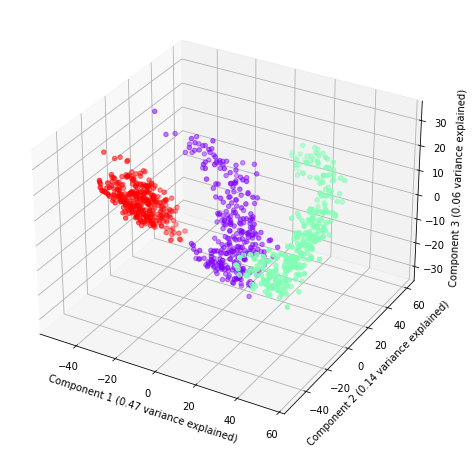

In [4]:
var = pca.steps[1][1].explained_variance_ratio_

labels, index = np.unique(y, return_inverse=True)
colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="3d")
ax.scatter(p[:, 0], p[:, 1], p[:, 2], color=colors[index, :])
ax.set_xlabel("Component 1 (%.2f variance explained)" % var[0])
ax.set_ylabel("Component 2 (%.2f variance explained)" % var[1])
ax.set_zlabel("Component 3 (%.2f variance explained)" % var[2])